<a href="https://colab.research.google.com/github/Sazam-ai/Plant-Disease-Prediction/blob/main/Plant_disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets

In [ ]:
try:
    train_df = pd.read_csv('Training.csv')
    test_df = pd.read_csv('Testing.csv')
except FileNotFoundError:
    print("Ensure 'Training.csv' and 'Testing.csv' are in the same directory.")
    pd.DataFrame({'symptom1': [1,0], 'symptom2': [0,1], 'prognosis': ['disease_A', 'disease_B']}).to_csv('Training.csv', index=False)
    pd.DataFrame({'symptom1': [1,0], 'symptom2': [0,1], 'prognosis': ['disease_A', 'disease_B']}).to_csv('Testing.csv', index=False)
    train_df = pd.read_csv('Training.csv')
    test_df = pd.read_csv('Testing.csv')

# Data Inspection and Preprocessing

In [ ]:
if 'Unnamed: 133' in train_df.columns:
    train_df = train_df.drop('Unnamed: 133', axis=1)

# Separate features (X) and target (y)
X_train = train_df.drop('prognosis', axis=1)
y_train_str = train_df['prognosis']
X_test = test_df.drop('prognosis', axis=1)
y_test_str = test_df['prognosis']

# Encode the categorical target variable 'prognosis'
le = LabelEncoder()
y_train = le.fit_transform(y_train_str)
y_test = le.transform(y_test_str)

# Model Training and Evaluation

# Decision Tree Classifier

--- Training Decision Tree ---
Accuracy: 0.9762

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common C

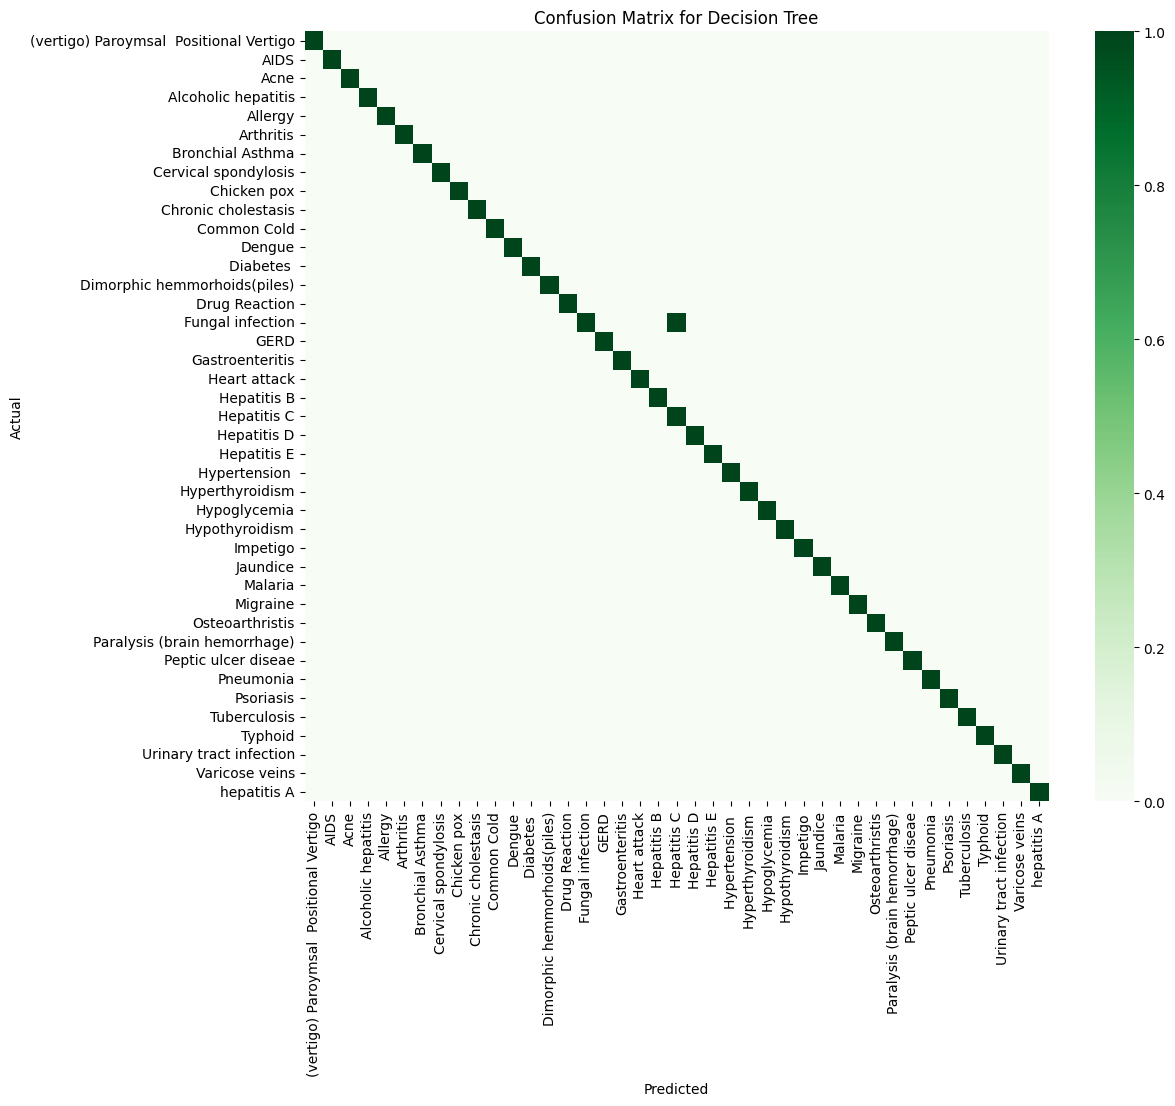

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# --- Training & Evaluating Decision Tree ---
print("--- Training Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

# Store results
results = {}
results["Decision Tree"] = accuracy_dt

# --- Visualization and Report for Decision Tree ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Generate and plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_dt, annot=False, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Decision_Tree_confusion_matrix.png")
# plt.show()
print("-" * 50 + "\n")

# Random Forest Classifier

--- Training Random Forest ---
Accuracy: 0.9762

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common C

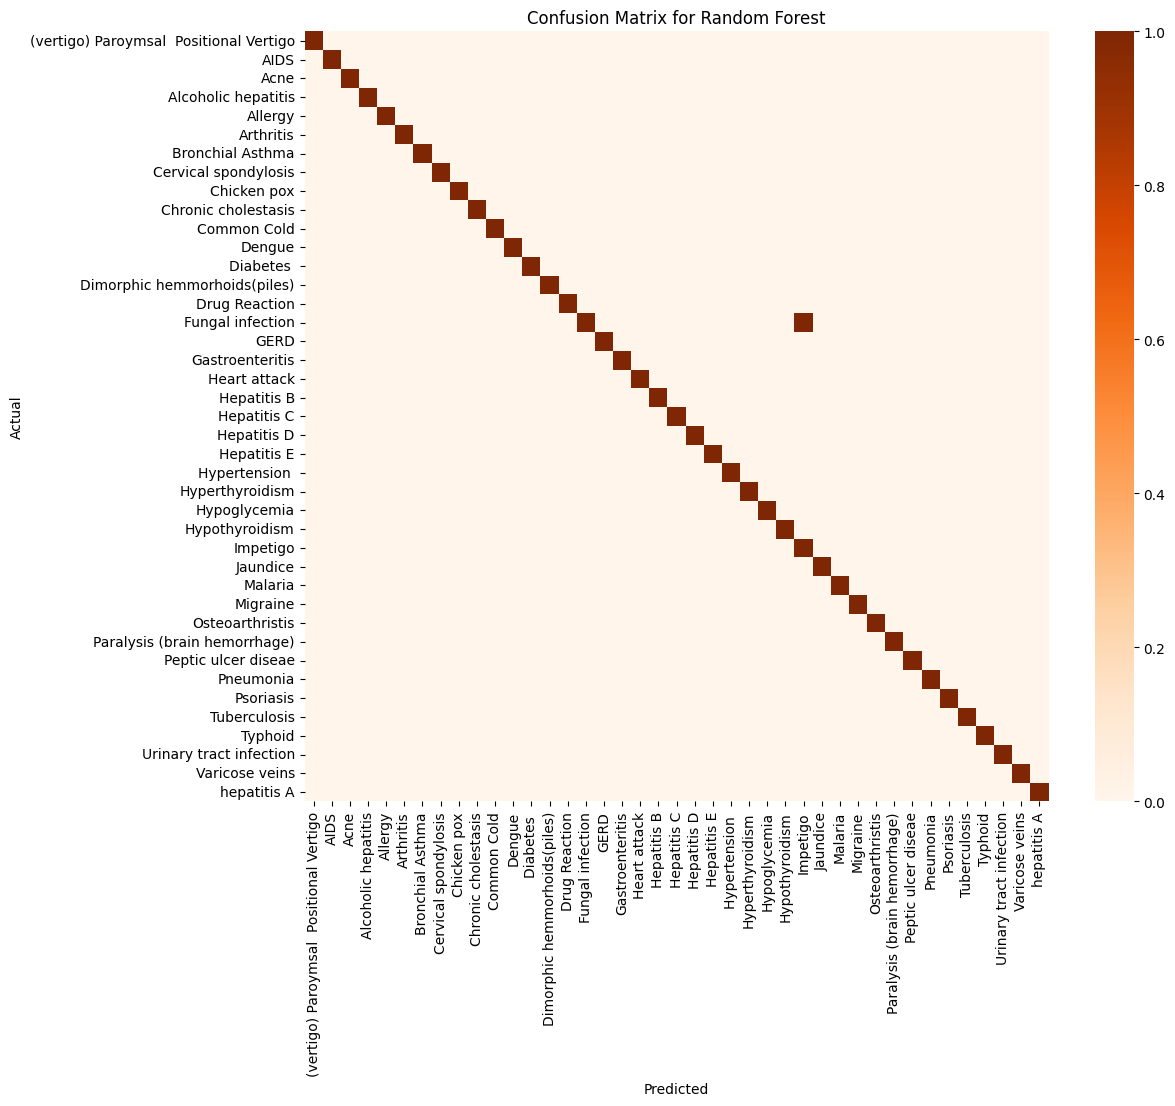

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# --- Training & Evaluating Random Forest ---
print("--- Training Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Store results
results["Random Forest"] = accuracy_rf

# --- Visualization and Report for Random Forest ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Generate and plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=False, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Random_Forest_confusion_matrix.png")
# plt.show()
print("-" * 50 + "\n")

# Support Vector Machine Classifier

--- Training Support Vector Machine ---
Accuracy: 1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                           

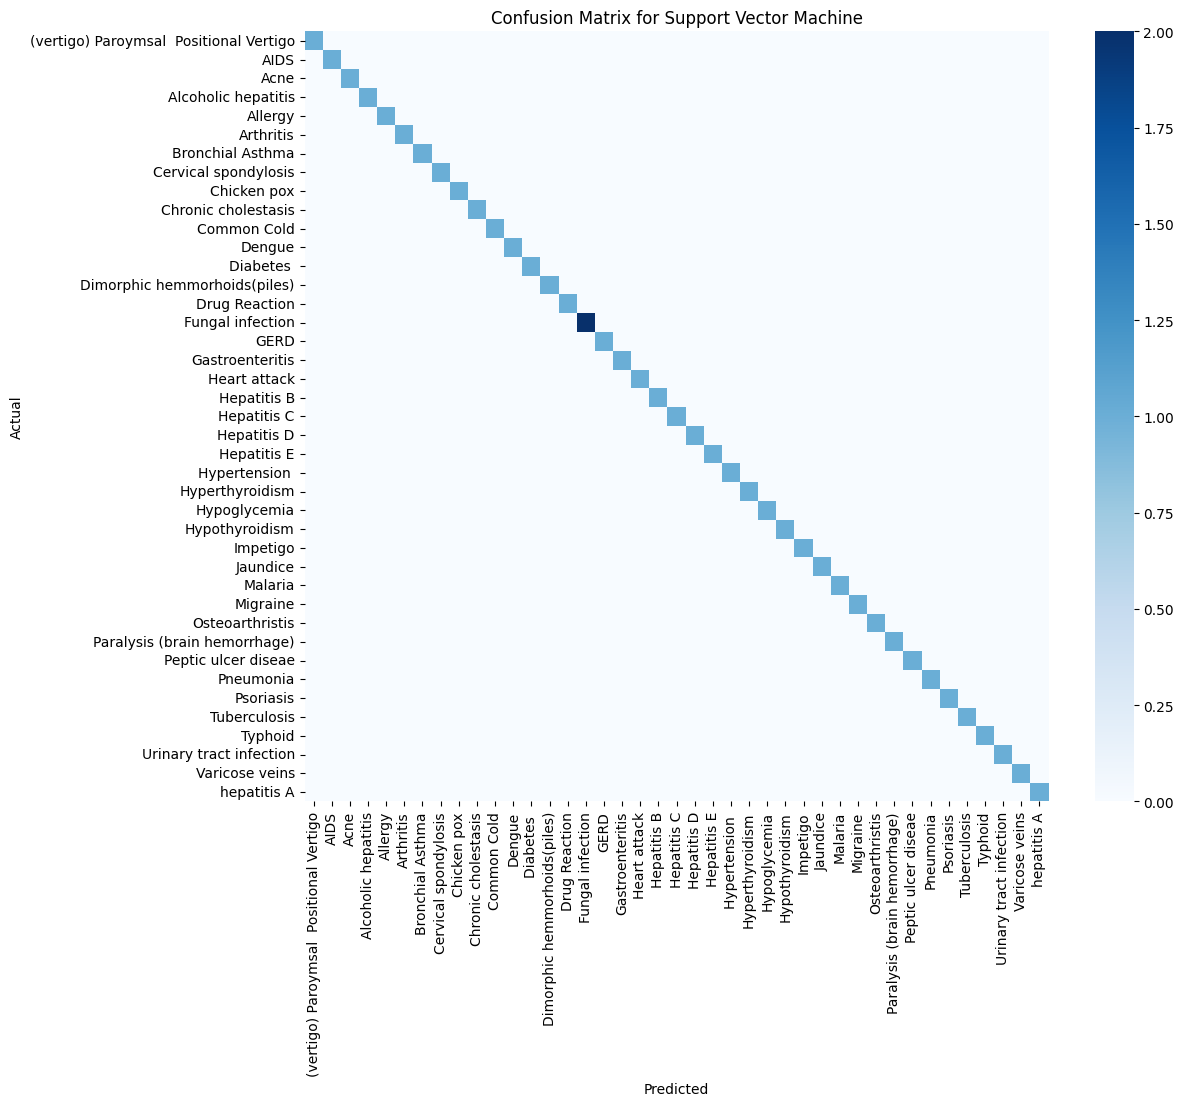

In [ ]:
from sklearn.svm import SVC

# --- Training & Evaluating Support Vector Machine ---
print("--- Training Support Vector Machine ---")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Store results
results["Support Vector Machine"] = accuracy_svm

# --- Visualization and Report for Support Vector Machine ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Generate and plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_svm, annot=False, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Support_Vector_Machine_confusion_matrix.png")
# plt.show()
print("-" * 50 + "\n")

# --- Display Final Results ---
print("--- All Model Accuracies ---")
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

# Logistic Regression

In [ ]:
print("--- Training Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
results["Logistic Regression"] = accuracy_log_reg
print(f"Accuracy: {accuracy_log_reg:.4f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg, target_names=le.classes_))
print("-" * 50 + "\n")

--- Training Logistic Regression ---
Accuracy: 1.0000

Classification Report for Logistic Regression:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
      

**Why not using Linear Regression ? **

In [ ]:
print("--- A Note on Linear vs. Logistic Regression ---")
print("""
Linear Regression is used for predicting a continuous outcome (e.g., predicting the price of a house).
This problem is a classification task, where the goal is to predict a discrete category (the disease).
The appropriate linear model for classification is Logistic Regression..
""")

--- A Note on Linear vs. Logistic Regression ---

Linear Regression is used for predicting a continuous outcome (e.g., predicting the price of a house).
This problem is a classification task, where the goal is to predict a discrete category (the disease).
The appropriate linear model for classification is Logistic Regression.

Below is the implementation for Logistic Regression.



# Results Summary

/tmp/ipython-input-27-83343317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')



--- Summary of Model Accuracies ---
                    Model  Accuracy
3     Logistic Regression   1.00000
2  Support Vector Machine   1.00000
1           Random Forest   0.97619
0           Decision Tree   0.97619

CSV file 'model_accuracies.csv' with these results has been created.
Confusion matrix plots and an accuracy comparison plot have been saved as PNG files.


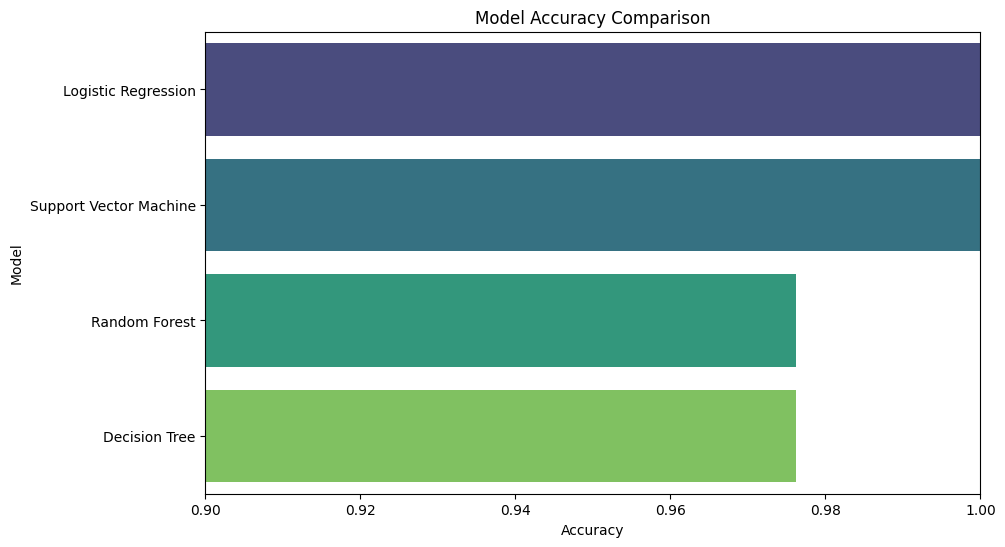

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df.to_csv('model_accuracies.csv', index=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.9, 1.0)
plt.savefig('accuracy_comparison.png')
# plt.show()


print("\n--- Summary of Model Accuracies ---")
print(results_df)
print("\nCSV file 'model_accuracies.csv' with these results has been created.")
print("Confusion matrix plots and an accuracy comparison plot have been saved as PNG files.")
